<a href="https://colab.research.google.com/github/Harika-2605/Data-Analytics/blob/main/Task%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv('/content/archive (1).zip')

In [4]:
segmentation_data = data[['price', 'number_of_reviews', 'availability_365']]


In [5]:
segmentation_data = segmentation_data.dropna()

In [6]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(segmentation_data)


In [7]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(scaled_data)

KMeans(n_clusters=4, random_state=42)

In [8]:
segmentation_data['Cluster'] = kmeans.labels_


In [9]:
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_summary = pd.DataFrame(cluster_centers, columns=segmentation_data.columns[:-1])
print("Cluster Centers:\n", cluster_summary)

Cluster Centers:
          price  number_of_reviews  availability_365
0   174.467502          16.334099        285.224913
1   134.797319          11.049276         24.435886
2   125.385877         149.222163        172.238561
3  4408.387500           3.250000        190.312500


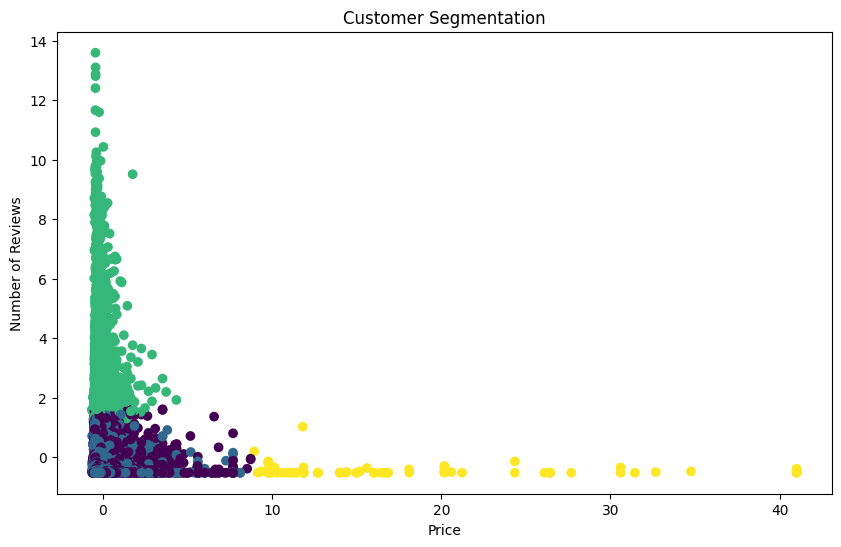

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title("Customer Segmentation")
plt.xlabel("Price")
plt.ylabel("Number of Reviews")
plt.show()